# Q1_syntheticdata

Importing the libraries

In [1]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt

Genertating each feature fi within the range of  (ai, bi) with 1000 datapoints

In [2]:
f1 = np.random.randint(2,13,size=(1000,))  # (a1 = 2 and b1 = 13)  
f2 = np.random.randint(5,17,size=(1000,))  # (a2 = 5 and b2 = 17)
f3 = np.random.randint(3,20,size=(1000,))  # (a3 = 3 and b3 = 20)
f4 = np.random.randint(8,37,size=(1000,))  # (a4 = 8 and b4 = 37)
f5 = np.random.randint(4,13,size=(1000,))  # (a5 = 4 and b5 = 13)

Important features, c value and Dataset

In [3]:
# important features have chossen to be f1 and f5
c1 = (2+13)//2
c5 = (4+13)//2
df = pd.DataFrame({"f1":f1, "f2":f2, "f3":f3, "f4":f4, "f5":f5})
df.head()


,f1,f2,f3,f4,f5
0,6,11,9,25,5
1,5,11,13,9,4
2,10,6,11,35,8
3,4,5,7,12,9
4,6,12,17,9,11


In [4]:
c1

7

In [5]:
c5

8

Genertaing probability for every datapoints

In [6]:
random_p = np.random.rand(1000)


In [7]:
df['probability'] = random_p

In [8]:
df.head()

,f1,f2,f3,f4,f5,probability
0,6,11,9,25,5,0.111454
1,5,11,13,9,4,0.011937
2,10,6,11,35,8,0.853480
3,4,5,7,12,9,0.908423
4,6,12,17,9,11,0.824622


Assign the labels to every datapoints according to given conditions

In [9]:
df['class'] = 0
df.head()

,f1,f2,f3,f4,f5,probability,class
0,6,11,9,25,5,0.111454,0
1,5,11,13,9,4,0.011937,0
2,10,6,11,35,8,0.853480,0
3,4,5,7,12,9,0.908423,0
4,6,12,17,9,11,0.824622,0


In [10]:
df.loc[(df['f1'] > c1) & (df['f5'] > c5) & (df['probability'] > 0.8), 'class'] = 1
df.loc[(df['f1'] < c1) & (df['f5'] < c5) & (df['probability'] > 0.2), 'class'] = 1
df.loc[(((df['f1'] > c1) & (df['f5'] < c5)) | ((df['f1'] < c1) & (df['f5'] > c5)))  & (df['probability'] > 0.5), 'class'] = 1

In [11]:
df.head()

,f1,f2,f3,f4,f5,probability,class
0,6,11,9,25,5,0.111454,0
1,5,11,13,9,4,0.011937,0
2,10,6,11,35,8,0.853480,0
3,4,5,7,12,9,0.908423,1
4,6,12,17,9,11,0.824622,1


Preparing Dataset for Decision Tree Algorithm

In [12]:
y = np.array(df['class'])
y

array([0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,

In [13]:
df.drop(['probability', 'class'], axis=1, inplace=True)
df.head()

,f1,f2,f3,f4,f5
0,6,11,9,25,5
1,5,11,13,9,4
2,10,6,11,35,8
3,4,5,7,12,9
4,6,12,17,9,11


Decision Tree Algorithm

In [14]:
# Split the given data into 80 percent training data and 20 percent testing data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df, y, test_size=0.2)

In [15]:
#Fit the given data
from sklearn.tree import DecisionTreeClassifier
model_tree = DecisionTreeClassifier(criterion = 'entropy')
model_tree = model_tree.fit(x_train, y_train)

In [16]:
#Make prediction on the test data
ypred_entropy = model_tree.predict(x_test)

In [17]:
# percentage of accuracy
from sklearn import metrics
print(metrics.accuracy_score(y_test, ypred_entropy))

0.655


In [18]:
# confusion matrix
print(metrics.confusion_matrix(y_test, ypred_entropy))

[[88 37]
 [32 43]]


[Text(0.4951171875, 0.98, 'X[0] <= 6.5\nentropy = 0.981\nsamples = 800\nvalue = [464, 336]'),
 Text(0.24590268342391305, 0.94, 'X[4] <= 7.5\nentropy = 0.989\nsamples = 389\nvalue = [171, 218]'),
 Text(0.13820482336956522, 0.9, 'X[1] <= 15.5\nentropy = 0.853\nsamples = 176\nvalue = [49, 127]'),
 Text(0.06615149456521739, 0.86, 'X[1] <= 6.5\nentropy = 0.821\nsamples = 160\nvalue = [41, 119]'),
 Text(0.021739130434782608, 0.82, 'X[2] <= 7.5\nentropy = 0.975\nsamples = 27\nvalue = [11, 16]'),
 Text(0.016304347826086956, 0.78, 'entropy = 0.0\nsamples = 8\nvalue = [0, 8]'),
 Text(0.02717391304347826, 0.78, 'X[4] <= 6.5\nentropy = 0.982\nsamples = 19\nvalue = [11, 8]'),
 Text(0.021739130434782608, 0.74, 'X[1] <= 5.5\nentropy = 0.837\nsamples = 15\nvalue = [11, 4]'),
 Text(0.016304347826086956, 0.7, 'X[0] <= 2.5\nentropy = 0.991\nsamples = 9\nvalue = [5, 4]'),
 Text(0.010869565217391304, 0.66, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.021739130434782608, 0.66, 'X[4] <= 5.5\nentrop

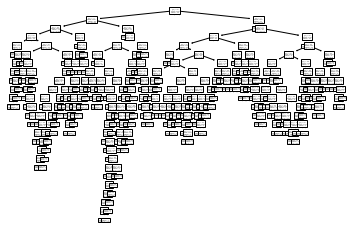

In [19]:
from sklearn import tree
tree.plot_tree(model_tree)

In [20]:
fc = ['f1','f2','f3','f4','f5']
from sklearn.tree import export_text
r = export_text(model_tree, feature_names=fc)
print(r)

|--- f1 <= 6.50
|   |--- f5 <= 7.50
|   |   |--- f2 <= 15.50
|   |   |   |--- f2 <= 6.50
|   |   |   |   |--- f3 <= 7.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- f3 >  7.50
|   |   |   |   |   |--- f5 <= 6.50
|   |   |   |   |   |   |--- f2 <= 5.50
|   |   |   |   |   |   |   |--- f1 <= 2.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- f1 >  2.50
|   |   |   |   |   |   |   |   |--- f5 <= 5.50
|   |   |   |   |   |   |   |   |   |--- f3 <= 13.50
|   |   |   |   |   |   |   |   |   |   |--- f5 <= 4.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |   |--- f5 >  4.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |--- f3 >  13.50
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- f5 >  5.50
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- f2 >  5.50
|   |   |   |   |   |   |   |

0.665
[[89 36]
 [31 44]]


[Text(0.5190983408505154, 0.9736842105263158, 'X[0] <= 6.5\ngini = 0.487\nsamples = 800\nvalue = [464, 336]'),
 Text(0.26308795103092786, 0.9210526315789473, 'X[4] <= 7.5\ngini = 0.493\nsamples = 389\nvalue = [171, 218]'),
 Text(0.13845038659793815, 0.868421052631579, 'X[1] <= 15.5\ngini = 0.402\nsamples = 176\nvalue = [49, 127]'),
 Text(0.06556056701030928, 0.8157894736842105, 'X[1] <= 6.5\ngini = 0.381\nsamples = 160\nvalue = [41, 119]'),
 Text(0.020618556701030927, 0.7631578947368421, 'X[2] <= 7.5\ngini = 0.483\nsamples = 27\nvalue = [11, 16]'),
 Text(0.015463917525773196, 0.7105263157894737, 'gini = 0.0\nsamples = 8\nvalue = [0, 8]'),
 Text(0.02577319587628866, 0.7105263157894737, 'X[4] <= 6.5\ngini = 0.488\nsamples = 19\nvalue = [11, 8]'),
 Text(0.020618556701030927, 0.6578947368421053, 'X[1] <= 5.5\ngini = 0.391\nsamples = 15\nvalue = [11, 4]'),
 Text(0.015463917525773196, 0.6052631578947368, 'X[0] <= 2.5\ngini = 0.494\nsamples = 9\nvalue = [5, 4]'),
 Text(0.010309278350515464, 0

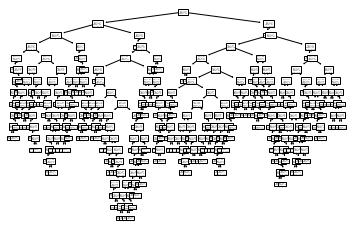

In [21]:
# Using gini index

#Fit the given data
tree1 = DecisionTreeClassifier()
tree1 = tree1.fit(x_train, y_train)

#Make prediction on the test data
ypred_gini = tree1.predict(x_test)

# percentage of accuracy
print(metrics.accuracy_score(y_test, ypred_gini))
#print(f'accuracy obtained is {metrics.accuracy_score(y_test, ypred_gini)*100:.2f}%')

# confusion matrix
print(metrics.confusion_matrix(y_test, ypred_gini))

# to visualize the decision tree
tree.plot_tree(tree1)

Decision Tree Regressor

In [22]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import fetch_california_housing

In [23]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size = 0.2)

model = DecisionTreeRegressor(criterion = 'squared_error', max_depth = 3)
model = model.fit(X_train, y_train)

In [24]:
y_pred = model.predict(X_test)
print(metrics.r2_score(y_test, y_pred))

0.1720497198337746


[Text(0.5416666666666666, 0.875, 'X[4] <= 7.5\nsquared_error = 0.241\nsamples = 800\nvalue = 0.406'),
 Text(0.3333333333333333, 0.625, 'X[0] <= 6.5\nsquared_error = 0.244\nsamples = 356\nvalue = 0.576'),
 Text(0.16666666666666666, 0.375, 'X[2] <= 3.5\nsquared_error = 0.184\nsamples = 164\nvalue = 0.756'),
 Text(0.08333333333333333, 0.125, 'squared_error = 0.0\nsamples = 7\nvalue = 1.0'),
 Text(0.25, 0.125, 'squared_error = 0.19\nsamples = 157\nvalue = 0.745'),
 Text(0.5, 0.375, 'X[0] <= 7.5\nsquared_error = 0.244\nsamples = 192\nvalue = 0.422'),
 Text(0.4166666666666667, 0.125, 'squared_error = 0.0\nsamples = 35\nvalue = 0.0'),
 Text(0.5833333333333334, 0.125, 'squared_error = 0.25\nsamples = 157\nvalue = 0.516'),
 Text(0.75, 0.625, 'X[4] <= 8.5\nsquared_error = 0.197\nsamples = 444\nvalue = 0.27'),
 Text(0.6666666666666666, 0.375, 'squared_error = 0.0\nsamples = 101\nvalue = 0.0'),
 Text(0.8333333333333334, 0.375, 'X[0] <= 6.5\nsquared_error = 0.227\nsamples = 343\nvalue = 0.35'),
 Te

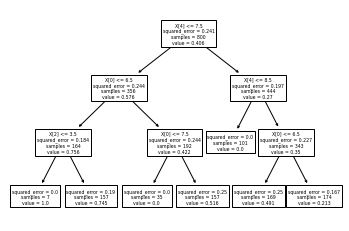

In [26]:
tree.plot_tree(model)